# Fase 1: Recorte de las imágenes

In [1]:
import os
files = ['Normal', 'COVID', 'Lung_Opacity','Viral Pneumonia']
path = "COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

data = []
mask = []

for id, level in enumerate(files):
    for file in os.listdir(os.path.join(data_dir, level+'/'+'images')):
#         data.append(['{}/{}'.format(level, file), level])
        data.append([level +'/' +'images'+ '/'+file, level])
    for file in os.listdir(os.path.join(data_dir, level+'/'+'masks')):
        mask.append([level +'/' +'masks'+ '/'+file, level])

## Path de las imágenes

In [2]:
import pandas as pd 
data = pd.DataFrame(data, columns = ['image_file', 'corona_result'])


data['path'] = path + '/' +data['image_file']
data['corona_result'] = data['corona_result'].map({'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'})

data.head()

image_file corona_result  \
0      Normal/images/Normal-1.png        Normal   
1     Normal/images/Normal-10.png        Normal   
2    Normal/images/Normal-100.png        Normal   
3   Normal/images/Normal-1000.png        Normal   
4  Normal/images/Normal-10000.png        Normal   

                                                path  
0  COVID-19_Radiography_Dataset/Normal/images/Nor...  
1  COVID-19_Radiography_Dataset/Normal/images/Nor...  
2  COVID-19_Radiography_Dataset/Normal/images/Nor...  
3  COVID-19_Radiography_Dataset/Normal/images/Nor...  
4  COVID-19_Radiography_Dataset/Normal/images/Nor...

## Path de las máscaras

In [3]:
mask = pd.DataFrame(mask, columns = ['image_file', 'corona_result'])
mask['path'] = path + '/' +mask['image_file']
mask['corona_result'] = mask['corona_result'].map({'Normal': 'Normal', 'COVID': 'Covid_positive', 'Lung_Opacity':'Lung_Opacity', 'Viral Pneumonia':'Viral_Pneumonia'})
mask.head()

image_file corona_result  \
0      Normal/masks/Normal-1.png        Normal   
1     Normal/masks/Normal-10.png        Normal   
2    Normal/masks/Normal-100.png        Normal   
3   Normal/masks/Normal-1000.png        Normal   
4  Normal/masks/Normal-10000.png        Normal   

                                                path  
0  COVID-19_Radiography_Dataset/Normal/masks/Norm...  
1  COVID-19_Radiography_Dataset/Normal/masks/Norm...  
2  COVID-19_Radiography_Dataset/Normal/masks/Norm...  
3  COVID-19_Radiography_Dataset/Normal/masks/Norm...  
4  COVID-19_Radiography_Dataset/Normal/masks/Norm...

In [4]:
samples,features = data.shape

## Mostrando imagen original y máscara

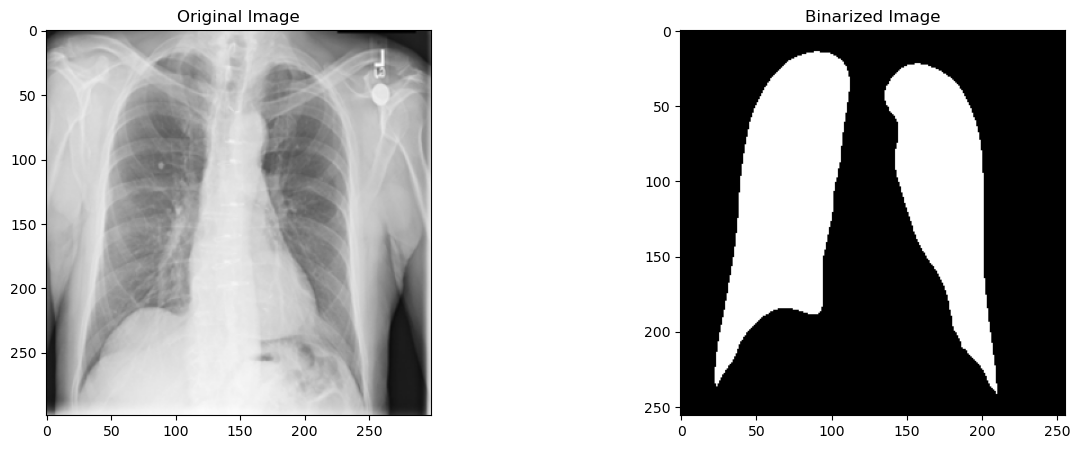

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Cargar la imagen original y la imagen binarizada
original_img = cv2.imread(data["path"][9])  
binarized_img = cv2.imread(mask["path"][9], 0)

#Mostrar las imágenes
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Binarized Image')
plt.imshow(binarized_img, cmap='gray')

## Ajustando parámetros de los contornos

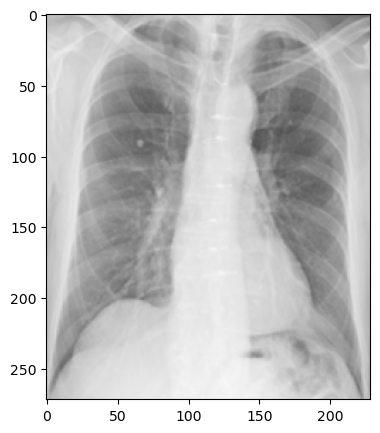

In [6]:

#Contornos en la imagen binarizada
contours, _ = cv2.findContours(binarized_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Filtro de los contornos basándose en el área (ajustar el valor de umbral según sea necesario)
min_area_threshold = 400  # Ajusta este valor según tus imágenes
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold]

#Inicializando las coordenadas del rectángulo que englobará ambos pulmones
x_min = float('inf')
y_min = float('inf')
x_max = 0
y_max = 0

#Actualizando las coordenadas x_min, y_min, x_max, y_max basándose en los contornos
for cnt in filtered_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    x_min = min(x_min, x)
    y_min = min(y_min, y)
    x_max = max(x_max, x + w*1.55)
    y_max = max(y_max, y + h*1.20)

#Asegurándose que las coordenadas están dentro de los límites de la imagen
x_min = max(x_min, 0)
y_min = max(y_min, 0)
x_max = min(x_max, original_img.shape[1])
y_max = min(y_max, original_img.shape[0])

#Recortando la imagen original basándose en el rectángulo delimitador que incluye ambos pulmones
cropped_img = original_img[int(y_min):int(y_max), int(x_min):int(x_max)]

#Mostrando la imagen recortada
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.show()


## Probando los parametros con una muestra de 20 radiografías

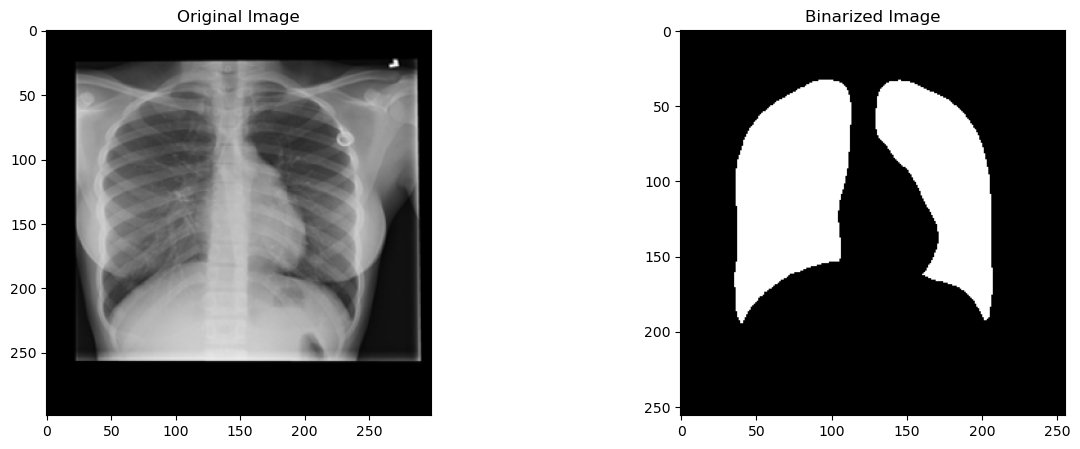

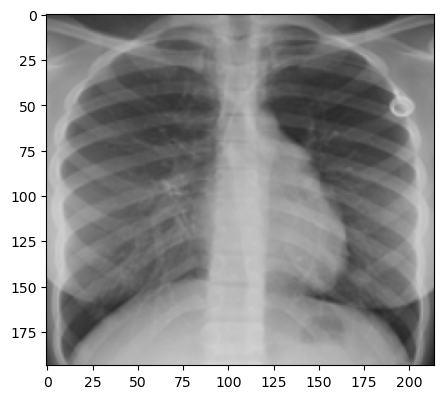

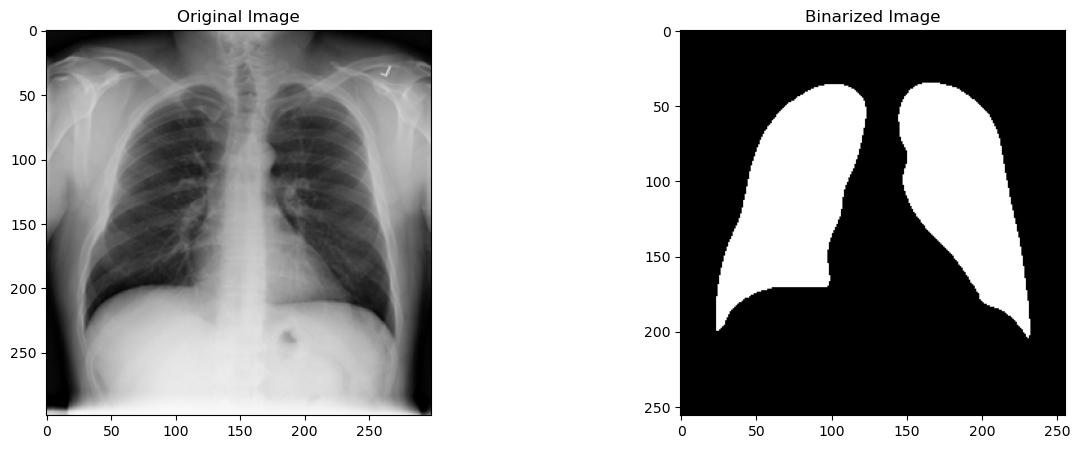

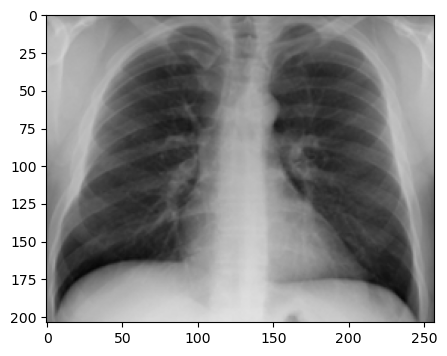

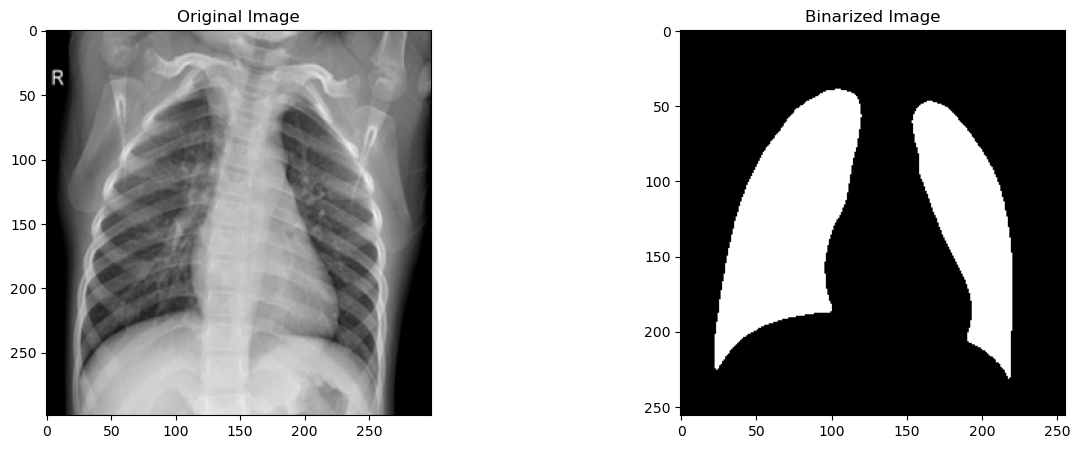

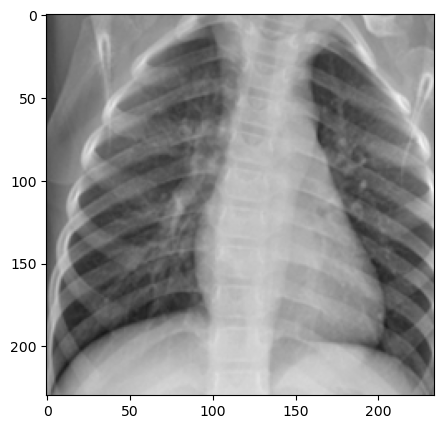

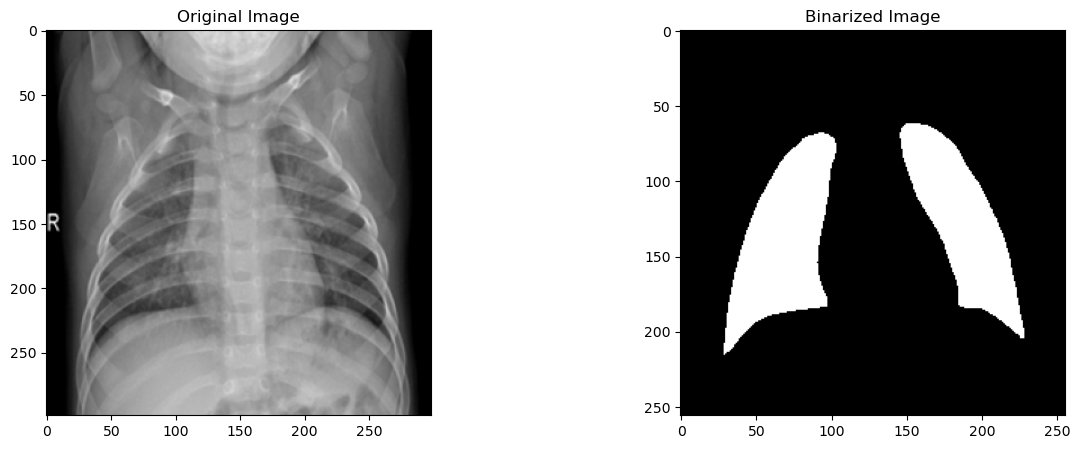

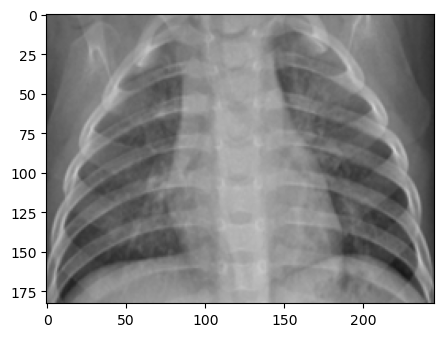

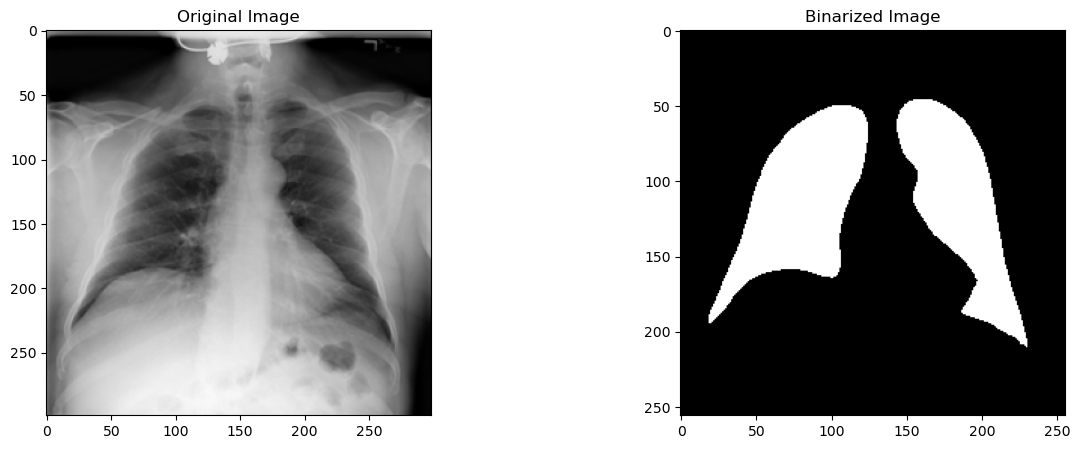

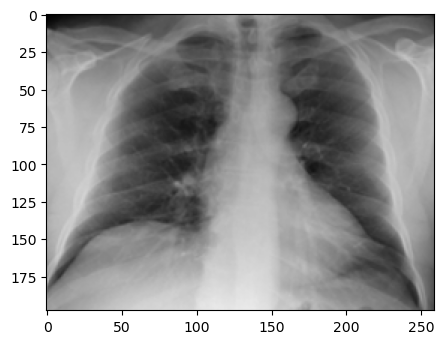

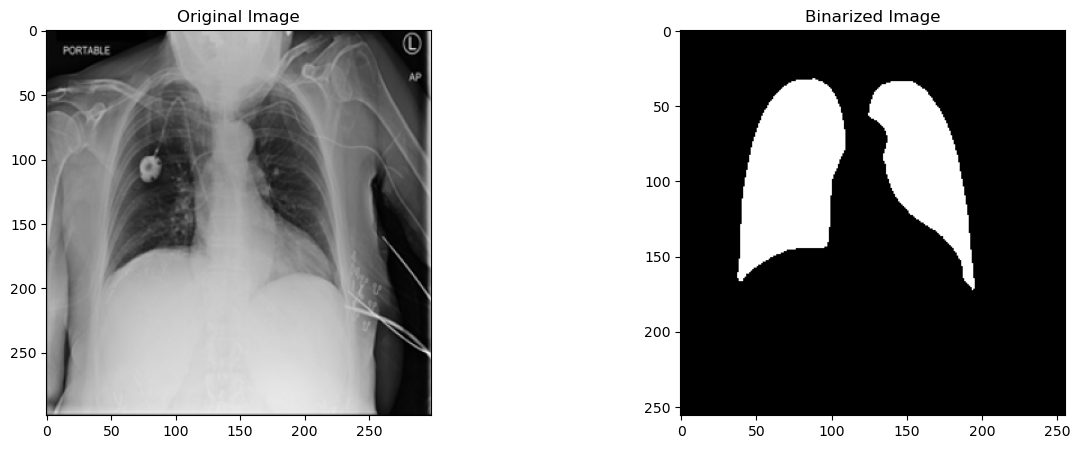

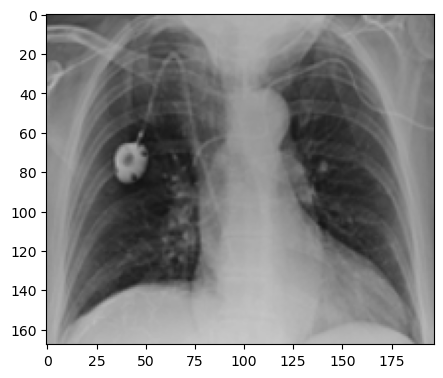

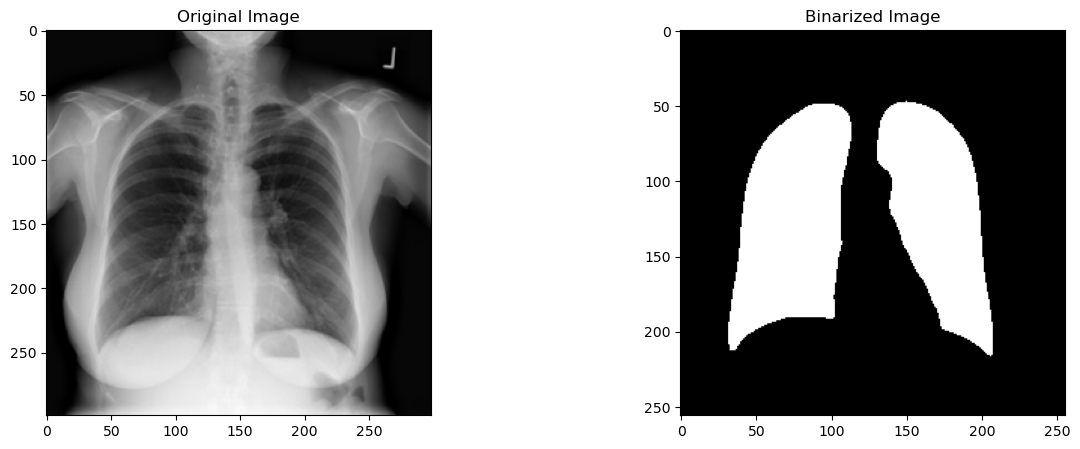

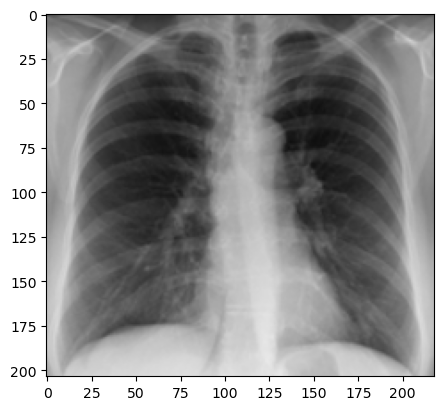

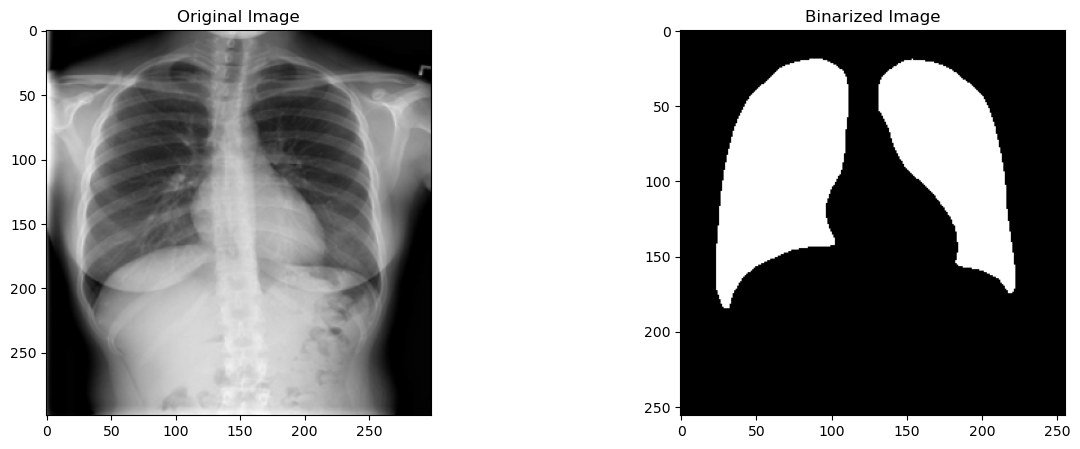

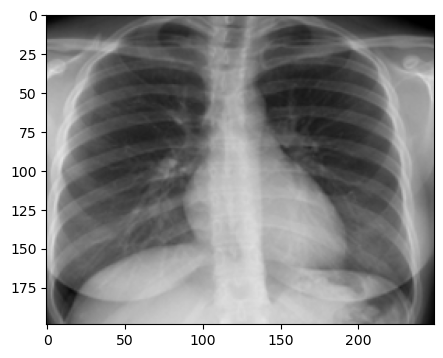

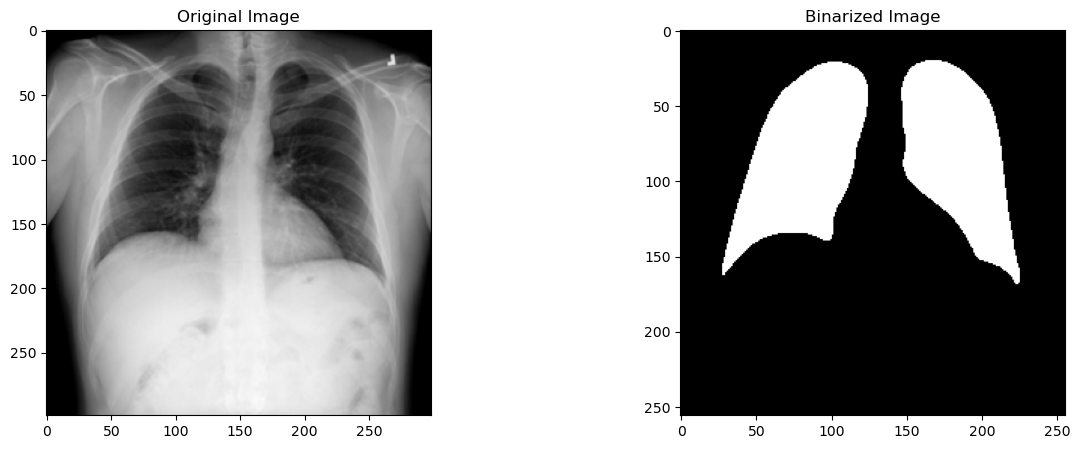

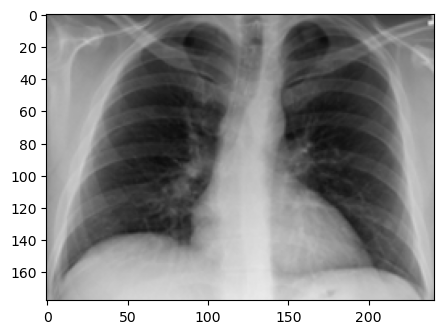

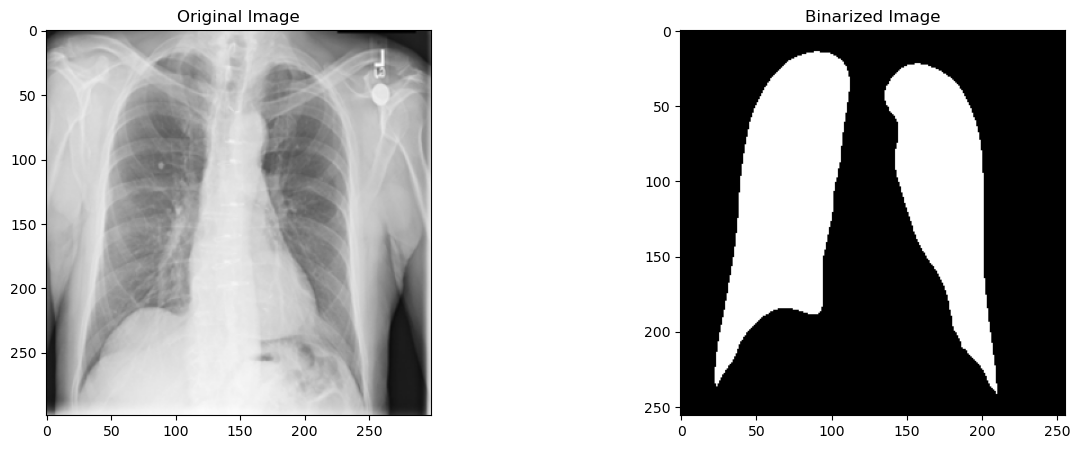

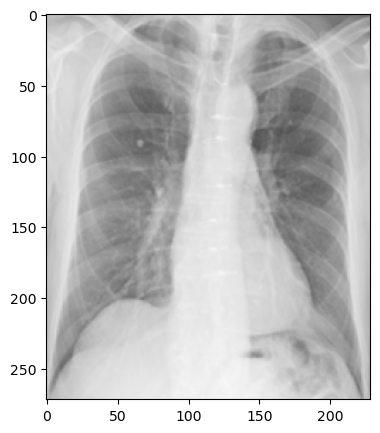

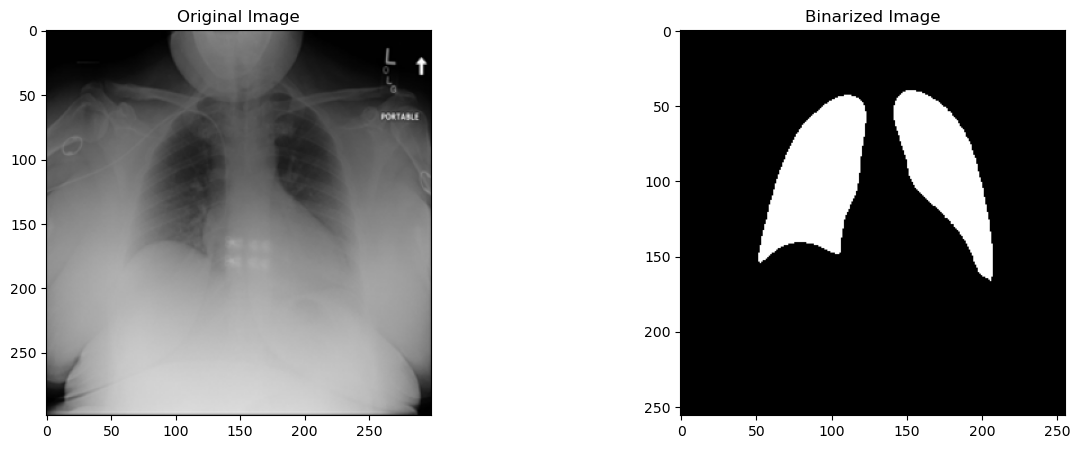

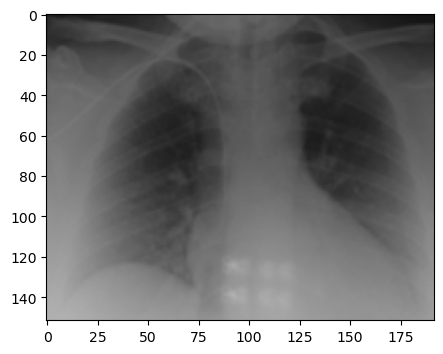

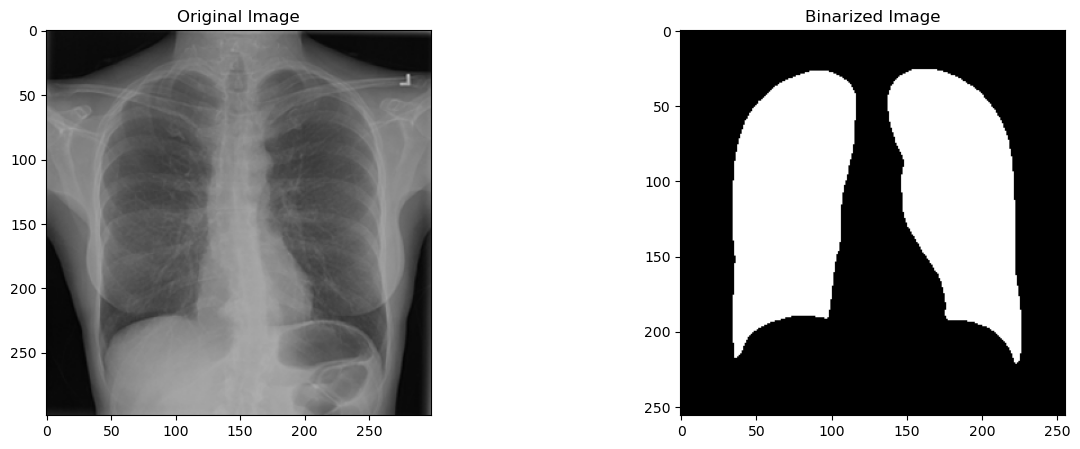

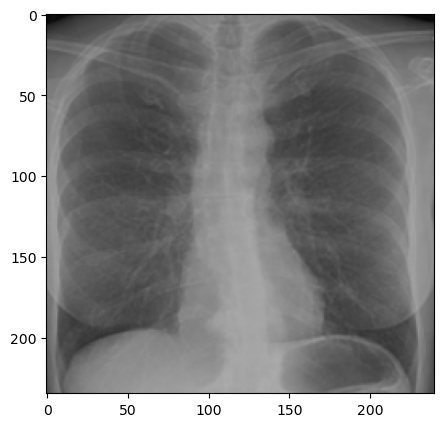

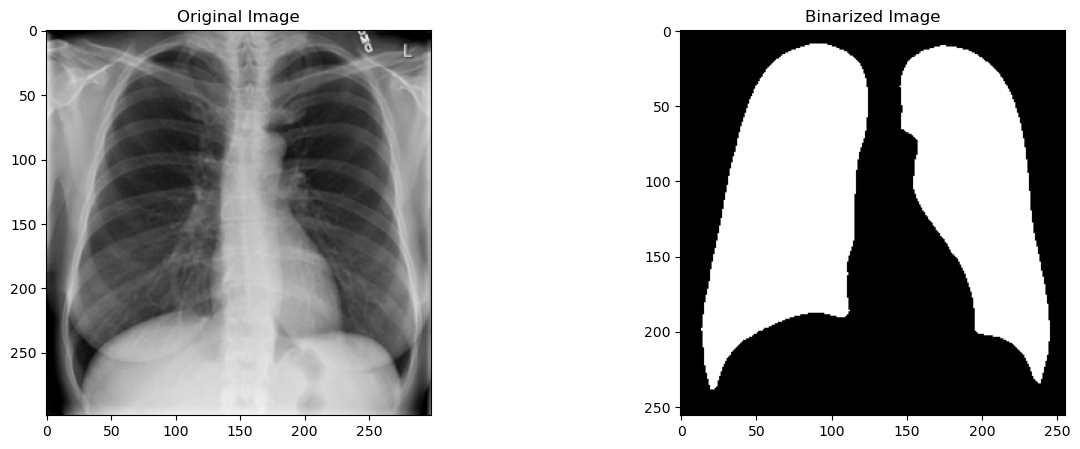

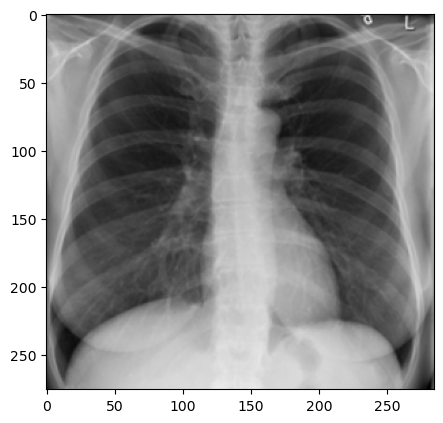

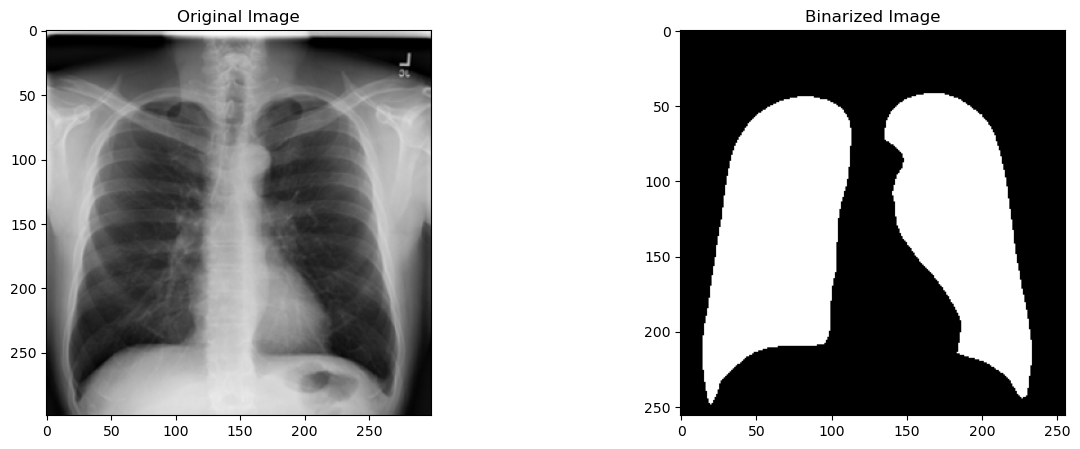

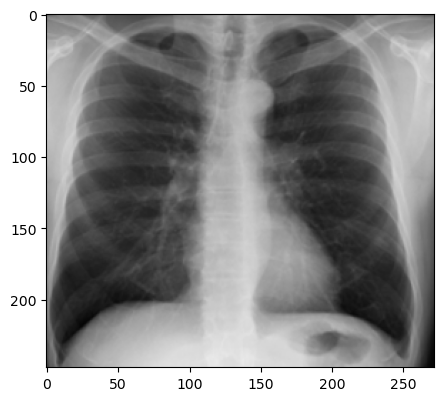

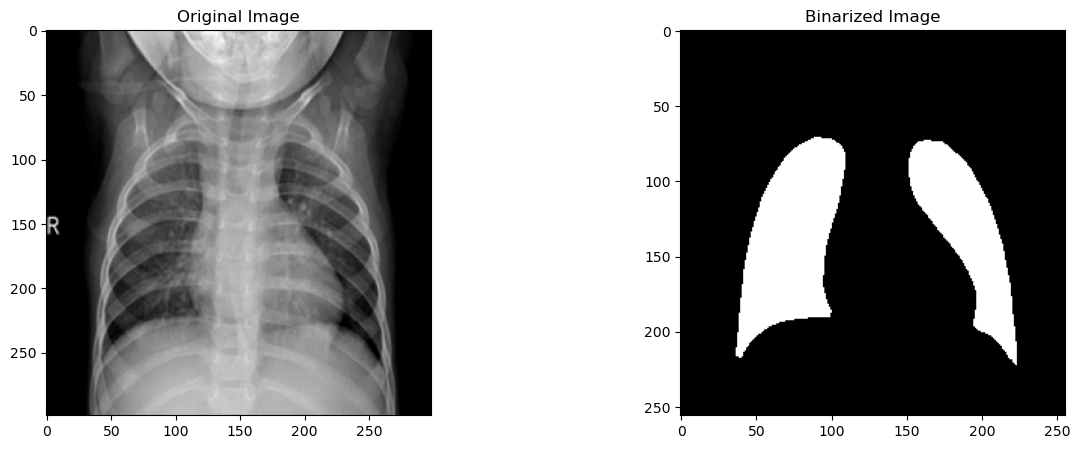

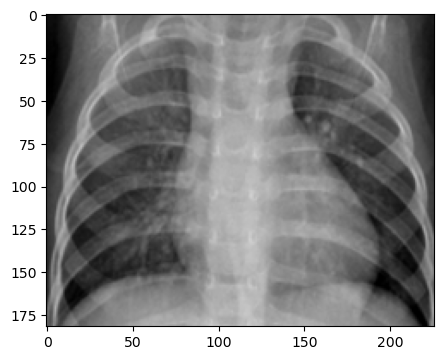

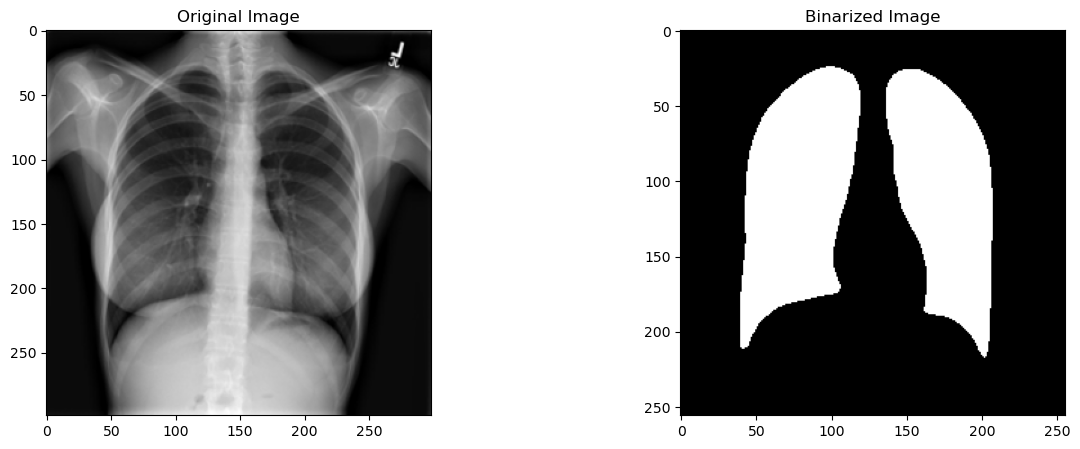

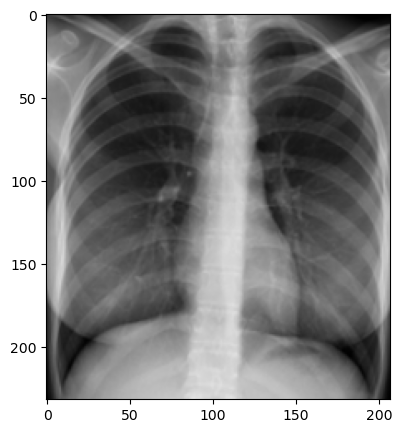

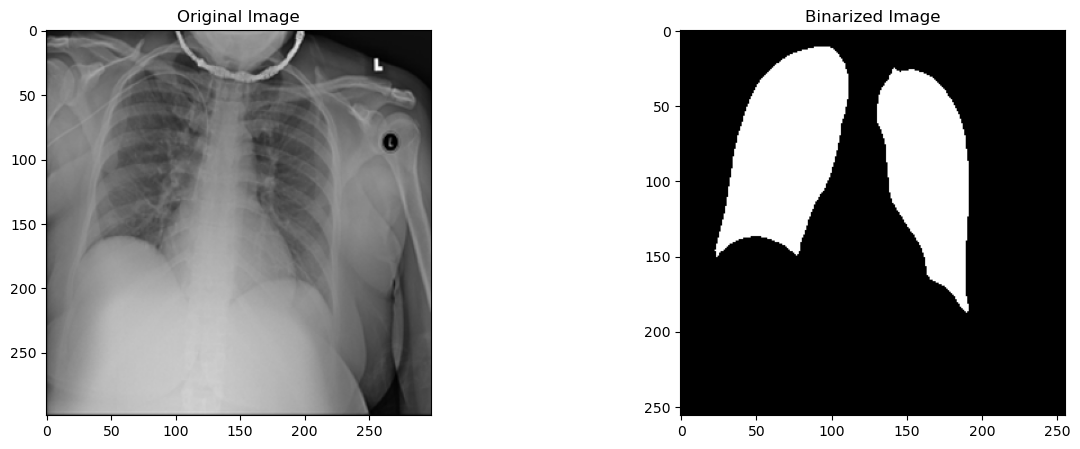

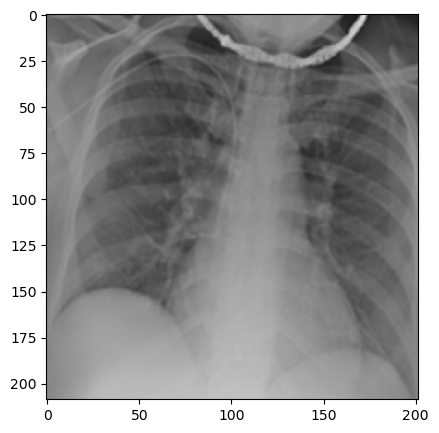

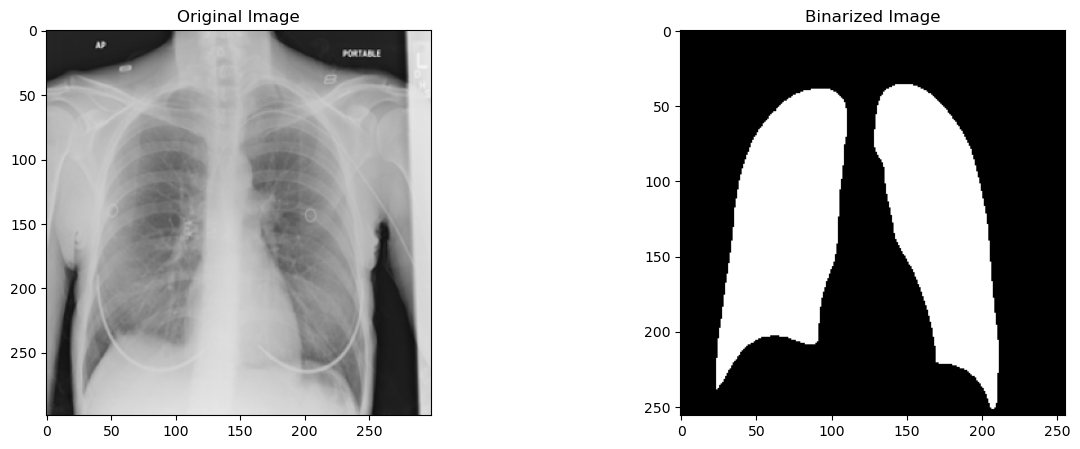

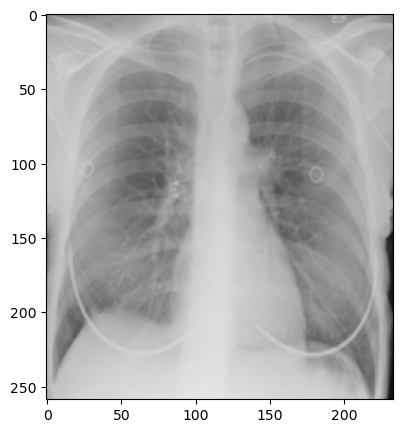

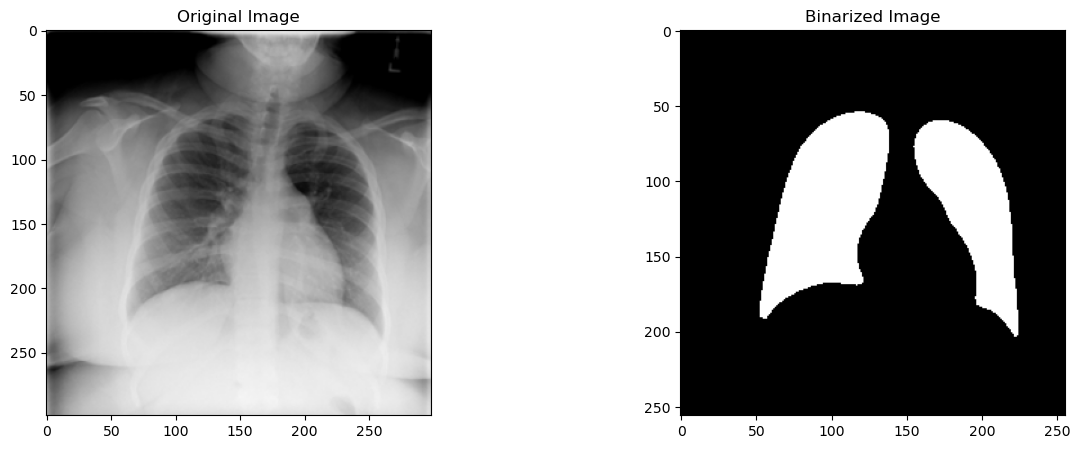

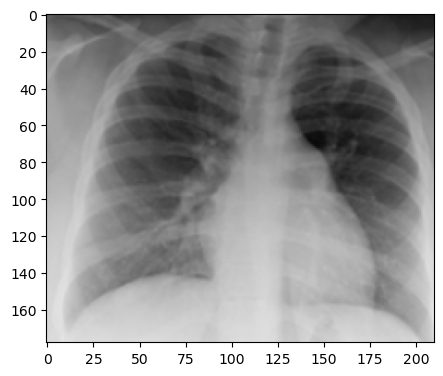

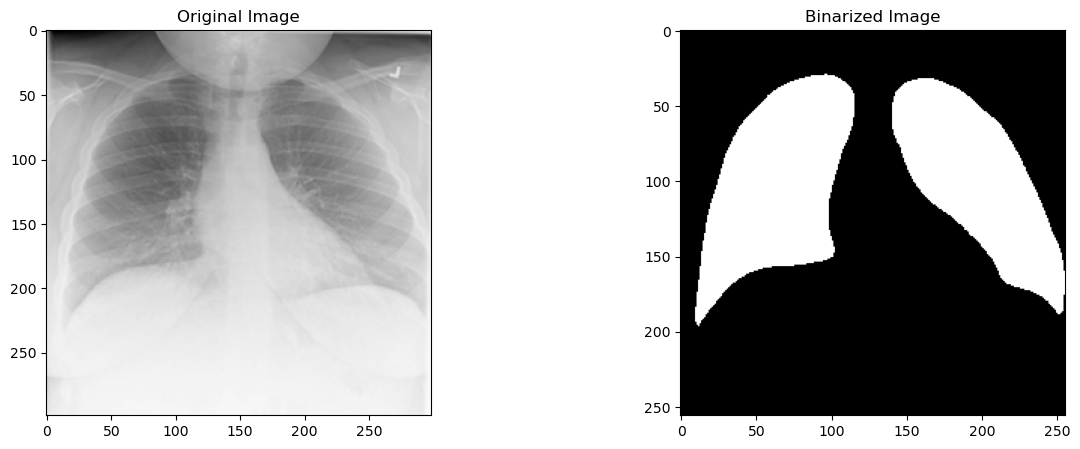

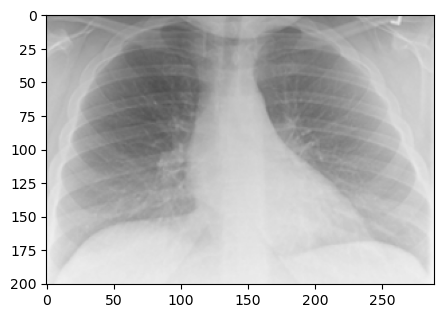

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

for i in range(0,20):

    # Cargar la imagen original y la imagen binarizada
    original_img = cv2.imread(data["path"][i])  # Asegúrate de poner el camino correcto a tu imagen
    binarized_img = cv2.imread(mask["path"][i], 0)  # Asegúrate de poner el camino correcto a tu imagen binarizada

    # Mostrar las imágenes
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Binarized Image')
    plt.imshow(binarized_img, cmap='gray')

        
    # Encontrar los contornos en la imagen binarizada
    contours, _ = cv2.findContours(binarized_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # Filtrar contornos basándose en el área (ajustar el valor de umbral según sea necesario)
    min_area_threshold = 400  # Ajusta este valor según tus imágenes
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold]

    # Inicializar las coordenadas del rectángulo que englobará ambos pulmones
    x_min = float('inf')
    y_min = float('inf')
    x_max = 0
    y_max = 0

    # Actualizar las coordenadas x_min, y_min, x_max, y_max basándose en los contornos
    for cnt in filtered_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w*1.55)
        y_max = max(y_max, y + h*1.20)

    # Asegurarse de que las coordenadas están dentro de los límites de la imagen
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, original_img.shape[1])
    y_max = min(y_max, original_img.shape[0])

    # Recortar la imagen original basándose en el rectángulo delimitador que incluye ambos pulmones
    cropped_img = original_img[int(y_min):int(y_max), int(x_min):int(x_max)]

    # Mostrar la imagen recortada
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.show()


## Creando la función de Recorte y guardado

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


for i in range(0,len(data)):

    #Ruta base para colocar el dataset recortado 
    base_path = "Dataset_Recortado"
    
    #Creando el directorio base
    if not os.path.exists(base_path):
        os.makedirs(base_path)
    
    #Ruta específica para cada categoría de resultado
    result_path = os.path.join(base_path, data["corona_result"][i])
    
    #Creando el directorio de resultado si no existe
    if not os.path.exists(result_path):
        os.makedirs(result_path)

    #Se carga la imagen original y la máscara
    imagen_original = cv2.imread(data["path"][i])  
    mascara = cv2.imread(mask["path"][i], 0)

    #Se encuentran los contornos de los pulmones en la máscara
    contornos, _ = cv2.findContours(mascara, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Se filtran los contornos según el área 
    min_area_pulmones = 400  #Se ajusto el valor del umbral a 400 por ser el mínimo más optimo según las muestras
    filtro_contornos = [cnt for cnt in contornos if cv2.contourArea(cnt) > min_area_pulmones]

    #Coordenadas del rectángulo que englobará ambos pulmones
    x_min = float('inf')
    y_min = float('inf')
    x_max = 0
    y_max = 0

    #Se actualizan las coordenadas x_min, y_min, x_max, y_max basado en los contornos
    for cnt in filtro_contornos:
        x, y, w, h = cv2.boundingRect(cnt)
        x_min = min(x_min, x)
        y_min = min(y_min, y)
        x_max = max(x_max, x + w*1.55) #Se ajusta el error para el ancho
        y_max = max(y_max, y + h*1.20) #Se ajusta el error para el alto

    #Asegurando que las coordenadas estén dentro de los límites de la imagen
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, imagen_original.shape[1])
    y_max = min(y_max, imagen_original.shape[0])

    #Recortamos la imagen original basado en el rectángulo delimitador que incluye ambos pulmones
    cropped_img = imagen_original[int(y_min):int(y_max), int(x_min):int(x_max)]

    #Obteniendo la carpeta de destino basada en el corona_result
    result_folder = os.path.join("Dataset Recortado", data["corona_result"][i])

    #Guardando la imagen recortada en la carpeta de destino
    cv2.imwrite(os.path.join(result_folder, f"cropped_{i}.png"), cropped_img)

    #Guardando la imagen recortada en la carpeta correspondiente
    filename = os.path.basename(data["path"][i]) 
    cv2.imwrite(os.path.join(result_path, filename), cropped_img)
